<a href="https://colab.research.google.com/github/magno12345/UPSO/blob/main/MAGNO_SOTELO_K_MEANS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Traigo las bibliotecas que voy a necesitar.

In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

Abro el dataset y chequeo si tiene datos nulos o erroneos.

In [2]:
#LE CAMBIO EL NOMBRE A 2 COLUMNAS PARA TRABAJAR MAS COMODO.
df = pd.read_csv("/content/drive/MyDrive/DATAFRAMES/clientes-kmeans.csv").rename(columns={"ingresosSemanales(miles$)":"ingresos","puntaje(1-100)":"puntaje"})
#df.isnull().sum()  #chequeo si tiene datos erroneos
#df.dtypes          #veo de q tipo son los datos para ver si tengo que hacer alguna modificacion.

Es necesario usar todos los datos brindados?
No,yo los separe justamente para descartar la columna sexo ,y la columna id tambien ,no le vi un uso,debe tener pero no en mi caso,la variable sexo vi que se puede pasar a ser un dato numerico,pero no lo hago xq ya los separe.  

Divido el dateset principal en 2 ,hombres y mujeres.

In [3]:
df_mujeres = df[(df['sexo'] == "F")].drop(["sexo","id"],axis = 1)#divido el dataset en mujeres y le borro las columnas que no voy a necesitar.
df_hombres = df[(df['sexo'] == "M")].drop(["sexo","id"],axis = 1)##dataframe de solo hombres
print(df_mujeres.value_counts().sum(),"Mujeres en total.")
print(df_hombres.value_counts().sum(),"Hombres en total.")

112 Mujeres en total.
88 Hombres en total.


Primero normalize las columnas para q los datos tengan las mismas proporciones,aqui estaba en duda  ,ya q el escalamiento se hace si hay una brecha muy grande entre numeros,igual mas adelante doy un ejemplo de escalado vs no escalado.Ejemplo:tengo una columna con numeros como 1001454 y en otra 45,ahi si que habria que hacer escalamiento de datos.La otra duda era el tipo de escalamiento que se hace,xq esta MixMaxScaler,StandardScaler ,Normalizer(),lei que aveces si no elegis el escalado adecuado es posible que se estropeen los datos.En todo el desarrollo no voy usar datos escalados,si lo voy a usar para corroborar la cantidad de k que voy a necesitar.  

Escalamiento de datos en Mujeres.


In [4]:
from sklearn.preprocessing import MinMaxScaler

df_mujeres_escalado= MinMaxScaler().fit(df_mujeres.values)
df_pre_F= pd.DataFrame(df_mujeres_escalado.transform(df_mujeres.values),columns=["edad","ingresos","puntaje"])
#df_pre_F  #TRABAJO CON ESTA VARIABLE

Escalamiento de datos en Hombres.me es util cuanto uso el metodo del codo ,xq se ve bien la forma del codo,cuando lo uso sin escalar el codo medio que no se forma y tendria que especular a la vista ,probar con distintos valores de k.

In [5]:
df_hombres_escalado= MinMaxScaler().fit(df_hombres.values)
df_pre_M= pd.DataFrame(df_hombres_escalado.transform(df_hombres.values),columns=["edad","ingresos","puntaje"])

Esta funcion auxiliar  me dice cuantos datos son asignados a cada grupo,la voy a utilizar en los graficos ,para ver la diferencia que tienen al estar normalizados y no normalizados.

In [6]:
def grupo(dato):
 df_tabla = pd.DataFrame(dato["cluster"].value_counts()).reset_index().rename(columns={"index":"GRUPOS","cluster":"COINCIDENCIAS"}).sort_values(by="GRUPOS")
 return df_tabla

Creo la funcion codo para calcular masomenos cuantos cluster podria necesitar,pasando como parametro x ,x son las variables a usar.Funciona mejor si le paso como parametro la variable pero escalada.

In [7]:
#METODO DEL CODO
def codo(x):
  inercias=[]
  for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(x)
    inercias.append(kmeans.inertia_)
  plt.plot(range(1, 10), inercias,marker="o")
  plt.xlabel("Clusters", fontsize=15)
  plt.ylabel("Inercia", fontsize=15)
  return plt.show()

Abajo muestro algunas combinaciones,quede en hacer:


*   Edad-Puntaje
*   Edad-Ingreso
*   Puntaje-Ingreso

Si hago la inversa a esas combinaciones me darian lo mismo.





Despues hay otras combinaciones que quise hacer pero no se podia porque tiene que haber la misma cantidad de hombres y mujeres en los 2 df,y habia mas mujeres que hombres,ahora te digo lo que queria hacer:

*   Ingresos/Hombres vs Ingresos/Mujeres
*   Puntaje/Hombres  vs Puntaje/Mujeres
*   Edad/Hombres/    vs Edad/Mujeres





GRAFICO CON EDAD Y PUNTAJE EN HOMBRES y MUJERES.





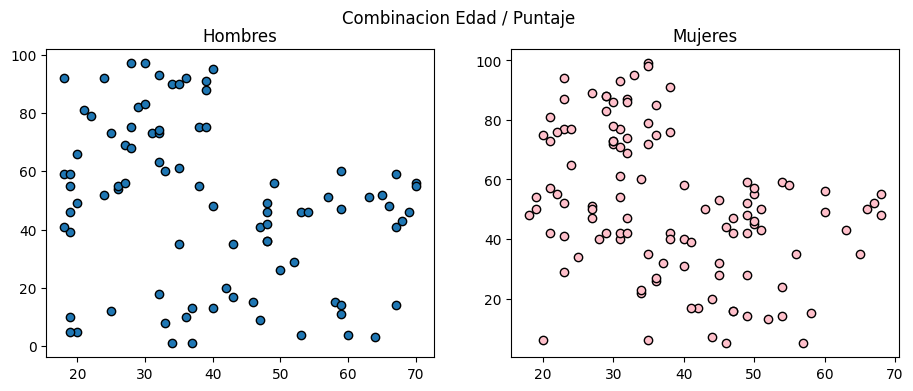

In [8]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)
plt.scatter(x = df_hombres["edad"], y =df_hombres["puntaje"],marker="o",edgecolors="black")#graficar este
plt.title("Hombres")
plt.subplot(1,2,2)
plt.scatter(x = df_mujeres["edad"], y =df_mujeres["puntaje"],marker="o",c="pink",edgecolors="black")#graficar este
plt.title("Mujeres")
plt.suptitle("Combinacion Edad / Puntaje")
plt.show()

GRAFICA DE EDAD E INGRESOS EN HOMBRES.


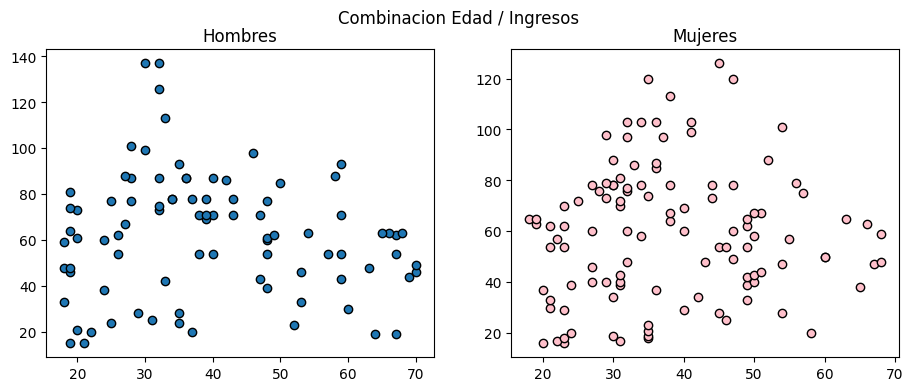

In [9]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)
plt.scatter(x = df_hombres["edad"], y =df_hombres["ingresos"],marker="o",edgecolors="black")#graficar este
plt.title("Hombres")
plt.subplot(1,2,2)
plt.scatter(x = df_mujeres["edad"], y =df_mujeres["ingresos"],marker="o",c="pink",edgecolors="black")#graficar este
plt.title("Mujeres")
plt.suptitle("Combinacion Edad / Ingresos")
plt.show()

Grafica con PUNTAJE E INGRESOS.grafique este ya que se se perfecta la separacion de grupos.ademas no puedo hacer ingreso con puntaje xq es lo mismo ,solo el grafico volteado.

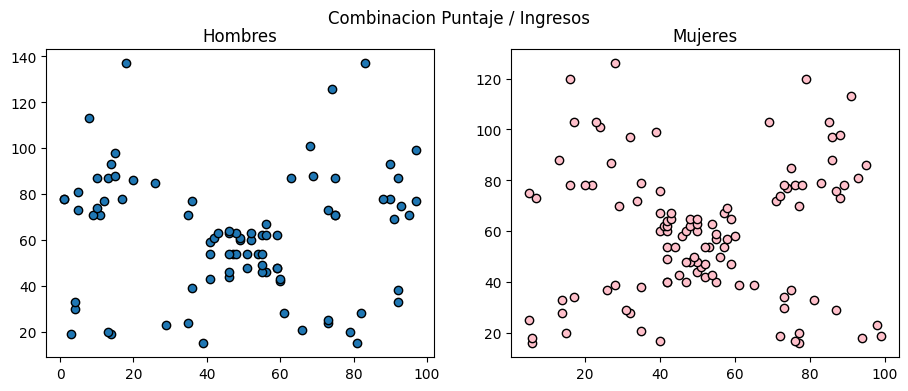

In [10]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)
plt.scatter(x = df_hombres["puntaje"], y =df_hombres["ingresos"],marker="o",edgecolors="black")#graficar este
plt.title("Hombres")
plt.subplot(1,2,2)
plt.scatter(x = df_mujeres["puntaje"], y =df_mujeres["ingresos"],marker="o",c="pink",edgecolors="black")#graficar este
plt.title("Mujeres")
plt.suptitle("Combinacion Puntaje / Ingresos")
plt.show()

GRAFICO DE EDAD CON PUNTAJE DE HOMBRES y MUJERES con K-MEANS.




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


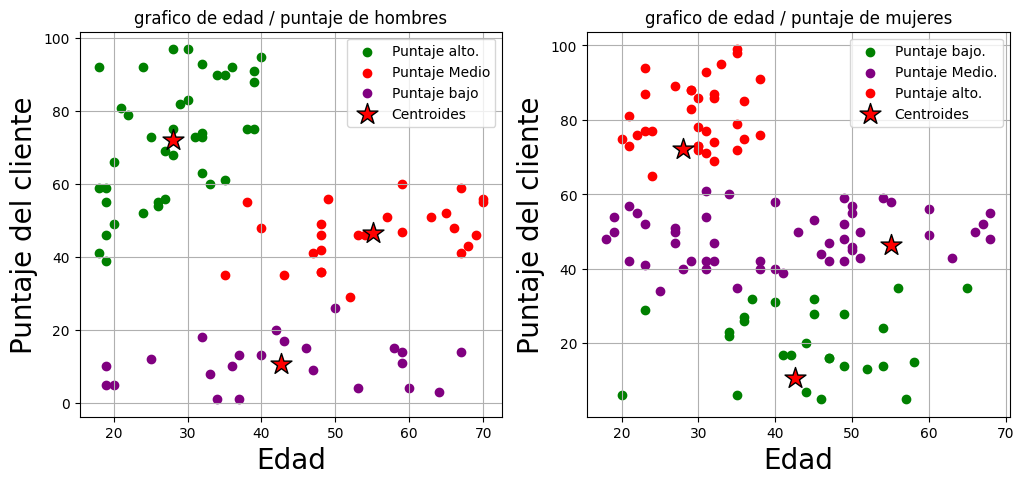

In [11]:
#TRABAJO CON ESTAS 2 COLUMNAS NOMAS
y = df_hombres[["edad","puntaje"]].copy()#LO PUEDO EVALUAR CON CODO.
#CREO EL CLASIFICADOR Y QUE SE AJUSTE A Y
km_2 = KMeans(n_clusters = 3,init = "random",random_state=0).fit(y)
#CLUSTERIZO LOS DATOS
y_km_2 = km_2.fit_predict(y)
#CREO UNA COLUMNA CON LOS DATOS CLUSTERIZADOS
y["cluster"] = y_km_2
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_=y[y.cluster==0]
g2_=y[y.cluster==1]
g3_=y[y.cluster==2]
#HAGO LOS  GRAFICO CON LAS SIGUIENTES DIMENSIONES
plt.figure(figsize=(12, 5))
#SUBPLOTEO LOS GRAFICOS
plt.subplot(1,2,1)
#GRAFICO TODOS LOS GRUPOS
plt.scatter(x = g1_["edad"],y = g1_["puntaje"],color ="green",label="Puntaje alto.")
plt.scatter(x = g2_["edad"],y = g2_["puntaje"],color ="red",label="Puntaje Medio")
plt.scatter(x = g3_["edad"],y = g3_["puntaje"],color ="purple",label="Puntaje bajo")
#GRAFICO LOS CENTROIDES.
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')
#LE PONGO TITULOS AL GRAFICO
plt.title("grafico de edad / puntaje de hombres")
plt.ylabel("Puntaje del cliente",fontsize=20)
plt.xlabel("Edad",fontsize=20)
plt.grid()
plt.legend()
##########################################################################################################################################################
#ESTA PARTE ES GENERO FEMENINO
#TRABAJO CON ESTAS 2 COLUMNAS NOMAS
y_f = df_mujeres[["edad","puntaje"]].copy()#LO EVALUO CON CODO.
#CREO EL CLASIFICADOR Y QUE SE AJUSTE A Y
km_2_f = KMeans(n_clusters = 3,init = "random",random_state=0).fit(y_f)
#CLUSTERIZO LOS DATOS
y_km_2_f = km_2_f.fit_predict(y_f)
#CREO UNA COLUMNA CON LOS DATOS CLUSTERIZADOS
y_f["cluster"] = y_km_2_f
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_f=y_f[y_f.cluster==0]
g2_f=y_f[y_f.cluster==1]
g3_f=y_f[y_f.cluster==2]
#CREO UNA FIGURA DE ESAS DIMENCIONES PARA QUE ME ENTRE LA LEYENDA
plt.subplot(1,2,2)
#GRAFICO TODOS LOS GRUPOS
plt.scatter(x = g1_f["edad"],y = g1_f["puntaje"],color ="green",label="Puntaje bajo.")
plt.scatter(x = g3_f["edad"],y = g3_f["puntaje"],color ="purple",label="Puntaje Medio.")
plt.scatter(x = g2_f["edad"],y = g2_f["puntaje"],color ="red",label="Puntaje alto.")
#GRAFICO LOS CENTROIDES.
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')
#LE PONGO TITULOS AL GRAFICO
plt.title("grafico de edad / puntaje de mujeres")
plt.ylabel("Puntaje del cliente",fontsize=20)
plt.xlabel("Edad",fontsize=20)
plt.grid()
plt.legend()
#GRAFICO LOS 2 GRAFICOS
plt.show()

En el grafico de hombres puntaje/edad:en la edad entre 20 y 40 hay buenos clientes con un puntaje entre 40 y 100.
En la edad entre 35 y 80 hay clientes regulares con puntaje entre 20 y 60.
En la edad entre 20 y 70 hay malos clientes con un puntaje de 0 a 20.

En el grafico de mujeres puntaje/edad:
Las mujeres entre 20 y 40 años son buenas clientas con puntuacion entre 70 y 100.
Las mujeres entre 20 y 70 años son clientas regulares. con puntacion entre 40 y 60.
Las mujeres entre 20 y 65 son malas clientas con una puntacion entre 10 y 35 puntos.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

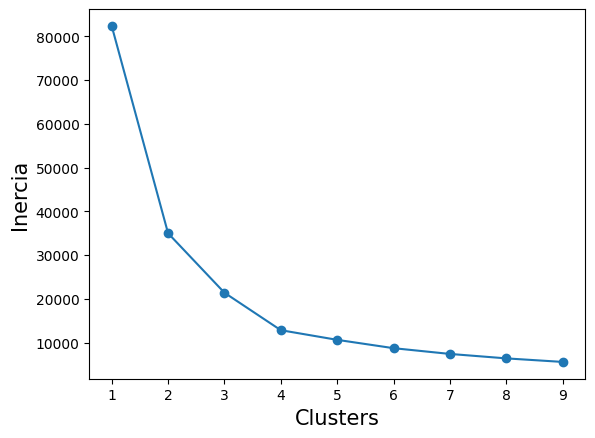

In [12]:
codo(y_f)# le pongo 4 ya que la curva se aplana a partir de ahi

GRAFICO DE INGRESO CON PUNTAJE.NO USO XQ ES IGUAL A PUNTAJE / INGRESO

In [13]:
#plt.scatter(x = df_hombres["ingresos"], y = df_hombres["puntaje"],marker="o")
#plt.show()

 GRAFICO el  grafico escalado y el mismo pero no escalado para comparar.PUNTAJE CON INGRESO DE HOMBRES.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


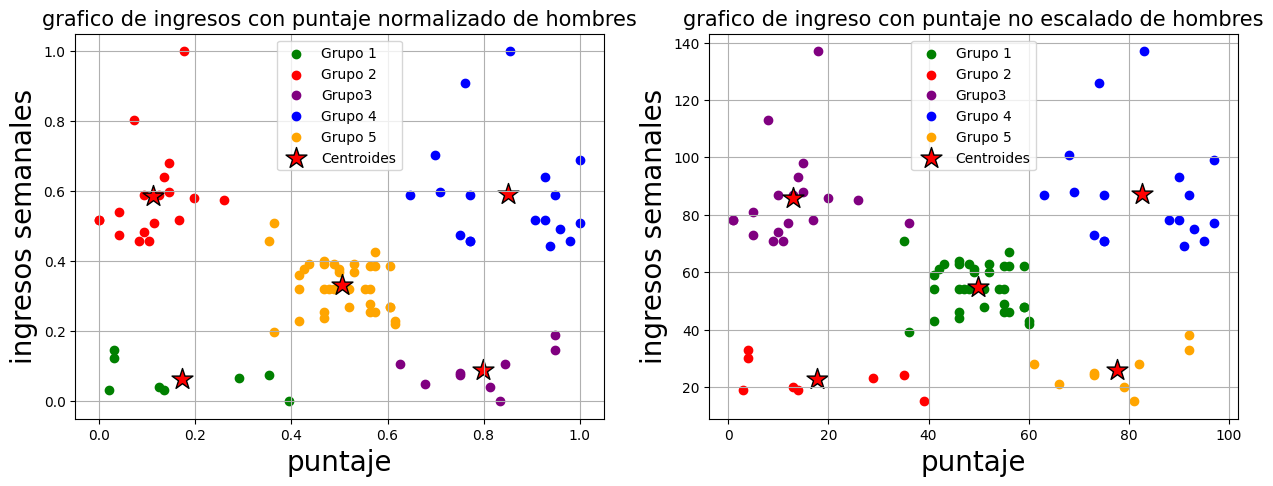

In [14]:
#TODO EL CODIGO HASTA LA SEPARACION ESTA  NORMALIZADO.

#NORMALIZO EL DF DE HOMBRES
df_hombres_escalado= MinMaxScaler().fit(df_hombres)
#CREO UN NUEVO DF CON LOS NUEVOS DATOS YA NORMALIZADOS.
df_pre_M= pd.DataFrame(df_hombres_escalado.transform(df_hombres),columns=["edad","ingresos","puntaje"])
#TRABAJO CON ESTA VARIABLE
df_pre_M
#TRABAJO CON ESTAS 2 COLUMNAS NOMAS.
x_esc = df_pre_M[["puntaje","ingresos"]]
#CREO EL CLASIFICADOR NORMALIZADO, Y QUE SE AJUSTE A  x_esc (A LAS 2 COLUMNAS)
km_esc = KMeans(n_clusters = 5 ,init = "random",random_state=0).fit(x_esc)
#CLUSTERIZO LOS DATOS NORMALIZADOS
y_km_esc = km_esc.fit_predict(x_esc)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SU RESPECTIVO DATO.
x_esc["cluster"] = y_km_esc
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_esc=x_esc[x_esc.cluster==0]
g2_esc=x_esc[x_esc.cluster==1]
g3_esc=x_esc[x_esc.cluster==2]
g4_esc=x_esc[x_esc.cluster==3]
g5_esc=x_esc[x_esc.cluster==4]
#HAGO LOS  GRAFICO CON LAS SIGUIENTES DIMENSIONES
plt.figure(figsize=(15, 5))
#SUBPLOTEO LOS GRAFICOS
plt.subplot(1,2,1)
#GRAFICO TODOS LOS GRUPOS
plt.scatter(x = g1_esc["puntaje"],y = g1_esc["ingresos"],color ="green",label="Grupo 1")
plt.scatter(x = g2_esc["puntaje"],y = g2_esc["ingresos"],color ="red",label="Grupo 2")
plt.scatter(x = g3_esc["puntaje"],y = g3_esc["ingresos"],color ="purple",label="Grupo3")
plt.scatter(x = g4_esc["puntaje"],y = g4_esc["ingresos"],color ="blue",label="Grupo 4")
plt.scatter(x = g5_esc["puntaje"],y = g5_esc["ingresos"],color ="orange",label="Grupo 5")
#GRAFICO LOS CENTROIDES.
plt.scatter(km_esc.cluster_centers_[:,0], km_esc.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')
#AGREGO TITULOS AL GRAFICO
plt.ylabel("ingresos semanales",fontsize=20)
plt.xlabel("puntaje",fontsize=20)
plt.title("grafico de ingresos con puntaje normalizado de hombres",fontsize=15)
plt.grid()
plt.legend()
#------------------------------------------------------------------------------------------------------------------------------------------
#TODO EL CODIGO DE ABAJO ESTA SIN NORMALIZAR.

#TRABAJO CON ESTAS 2 COLUMNAS NOMAS.
x = df_hombres[["puntaje","ingresos"]].copy()
#CREO EL CLASIFICADOR,Y QUE SE AJUSTE A X(A LAS 2 COLUMNAS)
km = KMeans(n_clusters = 5 ,init = "random",random_state=0).fit(x)
#CLUSTERIZAR LOS DATOS
y_km = km.fit_predict(x)
#AGREGO UNA COLUMNA LLAMADA CLUSTER,Y LE AGREGO EL NUMERO DE CLUSTER CON SU RESPECTIVO DATO.
x["cluster"] = y_km
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1=x[x.cluster==0]
g2=x[x.cluster==1]
g3=x[x.cluster==2]
g4=x[x.cluster==3]
g5=x[x.cluster==4]
#GRAFICO LOS GRAF DE ABAJO USANDO SUBPLOTS.
plt.subplot(1,2,2)
#GRAFICO TODOS LOS GRUPOS
plt.scatter(x = g1["puntaje"],y = g1["ingresos"],color ="green",label="Grupo 1")
plt.scatter(x = g2["puntaje"],y = g2["ingresos"],color ="red",label="Grupo 2")
plt.scatter(x = g3["puntaje"],y = g3["ingresos"],color ="purple",label="Grupo3")
plt.scatter(x = g4["puntaje"],y = g4["ingresos"],color ="blue",label="Grupo 4")
plt.scatter(x = g5["puntaje"],y = g5["ingresos"],color ="orange",label="Grupo 5")
#GRAFICO LOS CENTROIDES.
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')
#AGREGO TITULOS AL GRAFICO
plt.ylabel("ingresos semanales",fontsize=20)
plt.xlabel("puntaje",fontsize=20)
plt.title("grafico de ingreso con puntaje no escalado de hombres",fontsize=15)
plt.grid()
plt.legend()
#MUESTRO LOS 2 GRAFICOS
plt.show()

No utilice la columa sexo ya que el df lo dividi en femenino y masculino,en esta parte utilizo el masculino nomas,la columna id tambien la elimine ,no le veo uso .Primero normalice los datos en un grafico ya que k-means trabaja mejor si esta en un mismo rango de valores y en otro no lo normalice para ver si habia mucho cambios.
Mirando el grafico no se ven muchos cambios,solo la escala en x e y ,y los colores,respecto a los colores al normalizarlo cambiaron los valores y esto dio a que cambien los colores,solo quedo igual el GRUPO 4.
Se ve (en cualquiera de los 2 graficos) que los hombres con ingresos semanales
entre 10 y 40 mil dan una puntuacion al comercio de entre 0 y 40 puntos en el GRUPO 2.
GRUPO 1 = hombres con ingresos entre 40 y 70 mil dan un puntaje entre 40 y 60.
GRUPO 3=hombres con ingresos entre 70 y 140 mil dan un puntaje entre 0 y 40.  
GRUPO 4 =hombres con ingresos entre 70 y 140 mil dan un puntaje entre 60 y 100.
GRUPO 5 = hombres con ingresos entre 10 y 40 mil con puntaje de 60 y 100.
todo esto en el grafico no escalado.

al ver el grafico me pregunte influye lo que ganamos semanalmente,en nuestra desicion al momento de hacer las compras?si y no,por lo que se ve en el grafico,diria que dividida la decision,lo mismo va para el grafico de la mujeres.

Uso la funcion que cree antes,y te muestro como quedan armados los datos si estuvieran normalizados.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

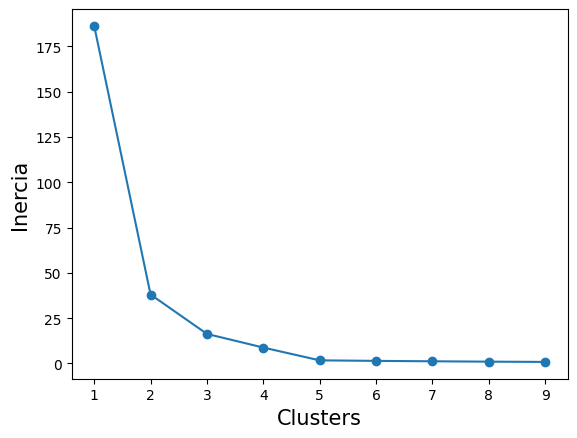

In [15]:
codo(x_esc)#ASI QUEDA NORMALIZADO UNA GRAN DIFERENCIA RESPECTO AL NO NORMALIZADO

Esta es con el grafico sin normalizar.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

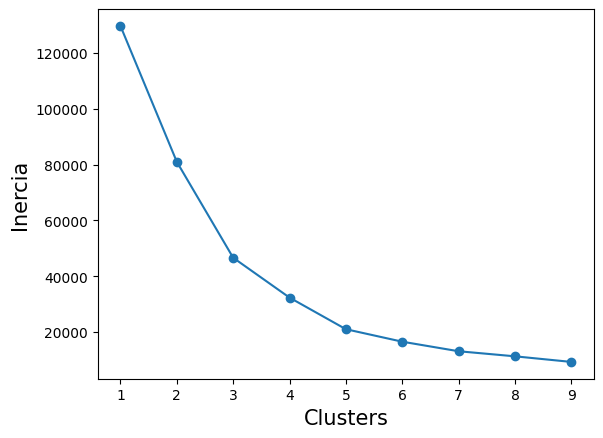

In [16]:
codo(x)#ASI QUEDA NO NORMALIZADO ,NO SE VE BIEN LA FORMA DEL CODO.pero si lo escalo se ve bien el codo.en el grafico anterior

GRAFICO DE PUNTAJE CON INGRESOS EN MUJERES.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


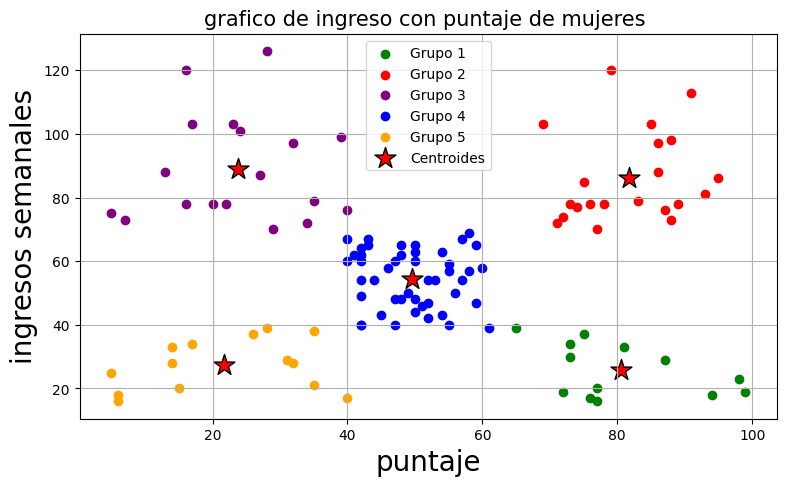

In [17]:
#TRABAJO CON ESTAS 2 COLUMNAS NOMAS.
x_f = df_mujeres[["puntaje","ingresos"]].copy()
#CREO EL CLASIFICADOR,Y QUE SE AJUSTE A X(A LAS 2 COLUMNAS)
kme_f = KMeans(n_clusters = 5 ,init = "random",random_state=0).fit(x_f)
#CLUSTERIZAR LOS DATOS
y_kmff = km.fit_predict(x_f)
#AGREGO UNA COLUMNA LLAMADA CLUSTER,Y LE AGREGO EL NUMERO DE CLUSTER CON SU RESPECTIVO DATO.
x_f["cluster"] = y_kmff
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1ff=x_f[x_f.cluster==0]
g2ff=x_f[x_f.cluster==1]
g3ff=x_f[x_f.cluster==2]
g4ff=x_f[x_f.cluster==3]
g5ff=x_f[x_f.cluster==4]
#GRAFICO TODOS LOS GRUPOS
plt.figure(figsize=(9, 5))
plt.scatter(x = g1ff["puntaje"],y = g1ff["ingresos"],color ="green",label="Grupo 1")
plt.scatter(x = g2ff["puntaje"],y = g2ff["ingresos"],color ="red",label="Grupo 2")
plt.scatter(x = g3ff["puntaje"],y = g3ff["ingresos"],color ="purple",label="Grupo 3")
plt.scatter(x = g4ff["puntaje"],y = g4ff["ingresos"],color ="blue",label="Grupo 4")
plt.scatter(x = g5ff["puntaje"],y = g5ff["ingresos"],color ="orange",label="Grupo 5")
#GRAFICO LOS CENTROIDES.
plt.scatter(kme_f.cluster_centers_[:,0], kme_f.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')
#AGREGO TITULOS AL GRAFICO
plt.ylabel("ingresos semanales",fontsize=20)
plt.xlabel("puntaje",fontsize=20)
plt.title("grafico de ingreso con puntaje de mujeres ",fontsize=15)
plt.grid()
plt.legend()
#MUESTRO LOS 2 GRAFICOS
#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

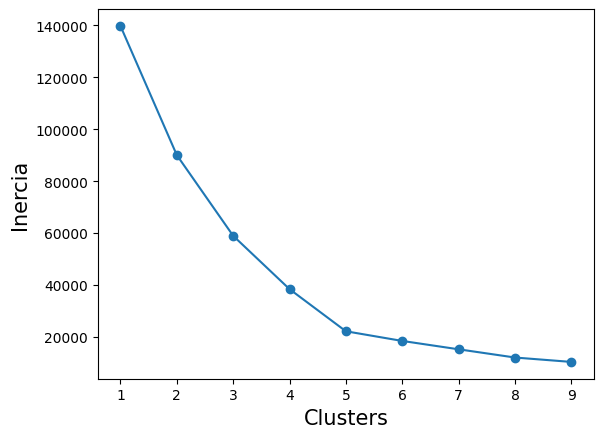

In [18]:
codo(x_f)#SE VE CLARAMENTE QUE LA CURVA DECRECE A PARTIR DE 5 K EN EL GRAFICO ANTERIOR

Es un grafico igual al de los hombres,no hace falta argumentar.

Implementacion de modelo K-Means,Usando EDAD CON INGRESOS MASCULINO y FEMENINO..

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


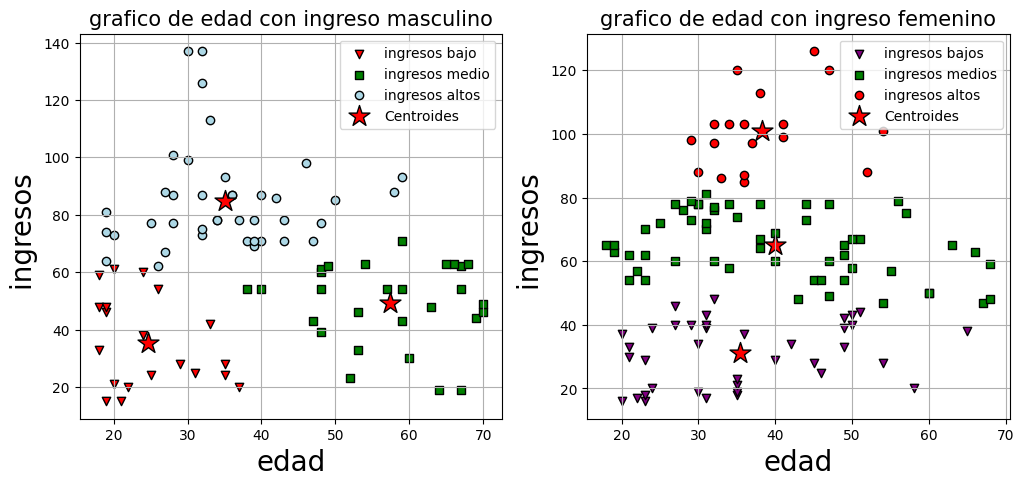

In [19]:
#ESTA PARTE ES MASCULINA.
x = df_hombres[["edad","ingresos"]].copy()
#CREO EL CLASIFICADOR,Y Q SE AJUSTE A X
km = KMeans(n_clusters = 3 ,init = "random",random_state=0).fit(x)
#CLUSTERIZAR LOS DATOS
y_km = km.fit_predict(x)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SUS RESPECTIVO DATO.
x["cluster"] = y_km
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1=x[x.cluster==0]
g2=x[x.cluster==1]
g3=x[x.cluster==2]
#GRAFICO TODOS LOS GRUPOS
#HAGO LOS  GRAFICO CON LAS SIGUIENTES DIMENSIONES
plt.figure(figsize=(12, 5))
#SUBPLOTEO LOS GRAFICOS
plt.subplot(1,2,1)
plt.scatter(x = g2["edad"],y = g2["ingresos"],marker="v",color ="red",edgecolor="black",label="ingresos bajo")
plt.scatter(x = g1["edad"],y = g1["ingresos"],marker="s",color="green",edgecolor="black",label="ingresos medio")
plt.scatter(x = g3["edad"],y = g3["ingresos"],marker="o",color ="lightblue",edgecolor="black",label="ingresos altos")
#GRAFICO LOS CENTROIDES
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')#grafico los centroides
#LE PONGO TITULOS
plt.ylabel("ingresos ",fontsize=20)
plt.xlabel("edad",fontsize=20)
plt.title("grafico de edad con ingreso masculino",fontsize=15)
plt.grid()
plt.legend()
###############################################################################################################################################################
#ESTA PARTE ES FEMENINA
x_f = df_mujeres[["edad","ingresos"]].copy()
#CREO EL CLASIFICADOR,Y Q SE AJUSTE A x_f
km_f= KMeans(n_clusters = 3 ,init = "random",random_state=0).fit(x_f)
#CLUSTERIZAR LOS DATOS
y_km_f = km.fit_predict(x_f)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SUS RESPECTIVO DATO.
x_f["cluster"] = y_km_f
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1f=x_f[x_f.cluster==0]
g2f=x_f[x_f.cluster==1]
g3f=x_f[x_f.cluster==2]
#GRAFICO LOS GRAF DE ABAJO USANDO SUBPLOTS.
plt.subplot(1,2,2)
#GRAFICO TODOS LOS GRUPOS
plt.scatter(x = g3f["edad"],y = g3f["ingresos"],marker="v",color ="purple",edgecolor="black",label="ingresos bajos")
plt.scatter(x = g1f["edad"],y = g1f["ingresos"],marker="s",color="green",edgecolor="black",label="ingresos medios")
plt.scatter(x = g2f["edad"],y = g2f["ingresos"],marker="o",color ="red",edgecolor="black",label="ingresos altos")
#GRAFICO LOS CENTROIDES
plt.scatter(km_f.cluster_centers_[:,0], km_f.cluster_centers_[:,1], s=250, marker='*', c='red', edgecolor='black', label='Centroides')#grafico los centroides
#LE PONGO TITULOS
plt.ylabel("ingresos ",fontsize=20)
plt.xlabel("edad",fontsize=20)
plt.title("grafico de edad con ingreso femenino",fontsize=15)
plt.grid()
plt.legend()
plt.show()


En el grafico de edad/ingreso masculino:
Hay hombres entre la edad de 20 y 50 que tienen ingresos altos.
Hay hombres entre la edad de 20 y 40 que tienen ingresos bajos.
Hay hombres entre la edad de 40 a 80 que tienen ingresos medios.   

En el grafico de edad/ingreso femenino se ve que hay mujeres entre 20 y 60 que tienen ingresos bajos entre 20 y 40 mil,en el rango de edad entre 30 y 60 son de ingresos altos.
Entrela edad de 20 a 70 años ,tienen ingresos medios.


Hago un clasificador mas que es el PCA (ANALISIS DE COMPONENTES PRINCIPALES),en resumen lo que hace es resumir las 3 varibles ,en 2 para poder graficarlas ,busca la mejor manera de representar las varibles originales.IMPORTANTE:use las varibles ESCALADAS ,ya que si no las escalo ,me dan resultados erroneos en el metodo PCA.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


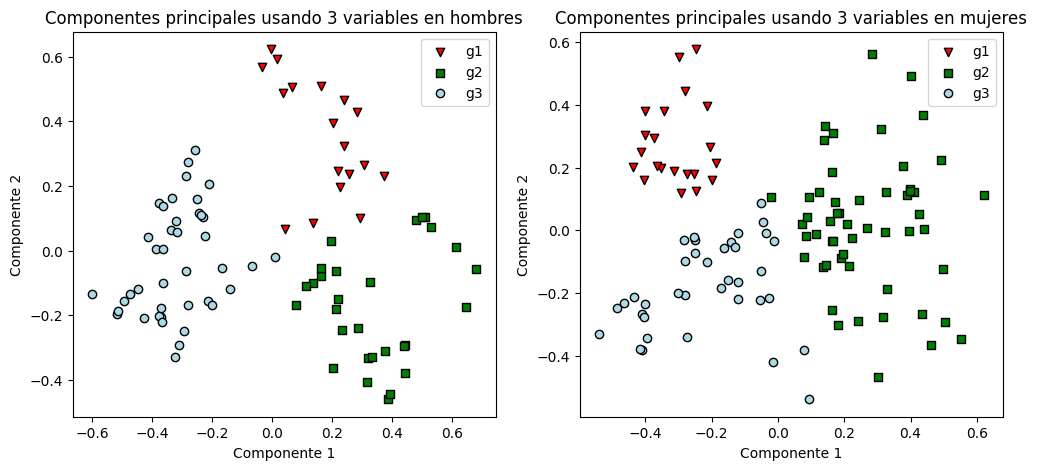

In [20]:
from sklearn.decomposition import PCA

df_hombres_copia = df_pre_M.copy()
hombres_pca = KMeans(n_clusters = 3,init="random",random_state=0).fit(df_hombres_copia)
#CLUSTERIZAR LOS DATOS
y_hombres = hombres_pca.fit_predict(df_hombres_copia)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SUS RESPECTIVO DATO.
df_hombres_copia["cluster"] = y_hombres

pca = PCA(n_components = 2)
pca_hombres = pca.fit_transform(df_pre_M)
pca_hombres_df = pd.DataFrame(data=pca_hombres,columns=["componente 1","componente 2"])
pca_hombres_nombres=pd.concat([pca_hombres_df,df_hombres_copia[["cluster"]]],axis=1)
plt.figure(figsize=(12, 5))
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_pca=pca_hombres_nombres[pca_hombres_nombres.cluster==0]
g2_pca=pca_hombres_nombres[pca_hombres_nombres.cluster==1]
g3_pca=pca_hombres_nombres[pca_hombres_nombres.cluster==2]
#GRAFICO TODOS LOS GRUPOS
plt.subplot(1,2,1)
plt.scatter(x = g1_pca["componente 1"],y = g1_pca["componente 2"],marker="v",color ="red",edgecolor="black",label="g1")
plt.scatter(x = g2_pca["componente 1"],y = g2_pca["componente 2"],marker="s",color="green",edgecolor="black",label="g2")
plt.scatter(x = g3_pca["componente 1"],y = g3_pca["componente 2"],marker="o",color ="lightblue",edgecolor="black",label="g3")
plt.title("Componentes principales usando 3 variables en hombres")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
###############################################################################################################################################################
df_mujeres_copia = df_pre_F.copy()
mujeres_pca = KMeans(n_clusters = 3,init="random",random_state = 0).fit(df_mujeres_copia)#EL N DE K LO CALCULE CON LA FUNCION CODO
#CLUSTERIZAR LOS DATOS
y_mujeres = mujeres_pca.fit_predict(df_mujeres_copia)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SUS RESPECTIVO DATO.
df_mujeres_copia["cluster"] = y_mujeres

pca_f= PCA(n_components = 2,random_state=0)#CREO EL CLASIFICADOR DE COMPONENTES PRINCIPALES
pca_mujeres = pca.fit_transform(df_pre_F)
pca_mujeres_df = pd.DataFrame(data=pca_mujeres,columns=["componente 1","componente 2"])
pca_mujeres_nombres=pd.concat([pca_mujeres_df,df_mujeres_copia[["cluster"]]],axis=1)
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_pca_f=pca_mujeres_nombres[pca_mujeres_nombres.cluster==0]
g2_pca_f=pca_mujeres_nombres[pca_mujeres_nombres.cluster==1]
g3_pca_f=pca_mujeres_nombres[pca_mujeres_nombres.cluster==2]
#GRAFICO TODOS LOS GRUPOS
plt.subplot(1,2,2)
plt.scatter(x = g1_pca_f["componente 1"],y = g1_pca_f["componente 2"],marker="v",color ="red",edgecolor="black",label="g1")
plt.scatter(x = g2_pca_f["componente 1"],y = g2_pca_f["componente 2"],marker="s",color="green",edgecolor="black",label="g2")
plt.scatter(x = g3_pca_f["componente 1"],y = g3_pca_f["componente 2"],marker="o",color ="lightblue",edgecolor="black",label="g3")
plt.title("Componentes principales usando 3 variables en mujeres")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

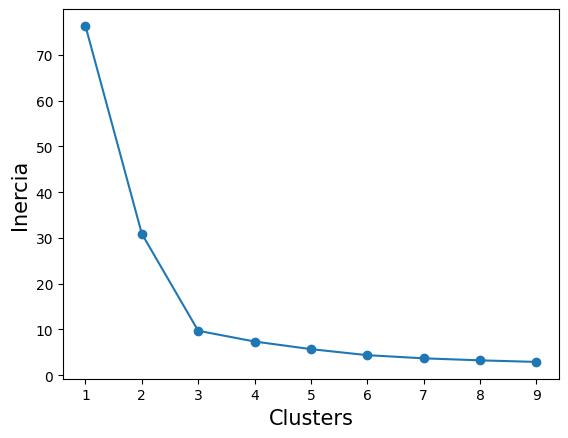

In [21]:
codo(df_mujeres_copia)

In [22]:
grupo(df_mujeres_copia)

,GRUPOS,COINCIDENCIAS
2,0,21
0,1,54
1,2,37


Ahora hago un PCA con el dataframe original sin separar en hombres y mujeres.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


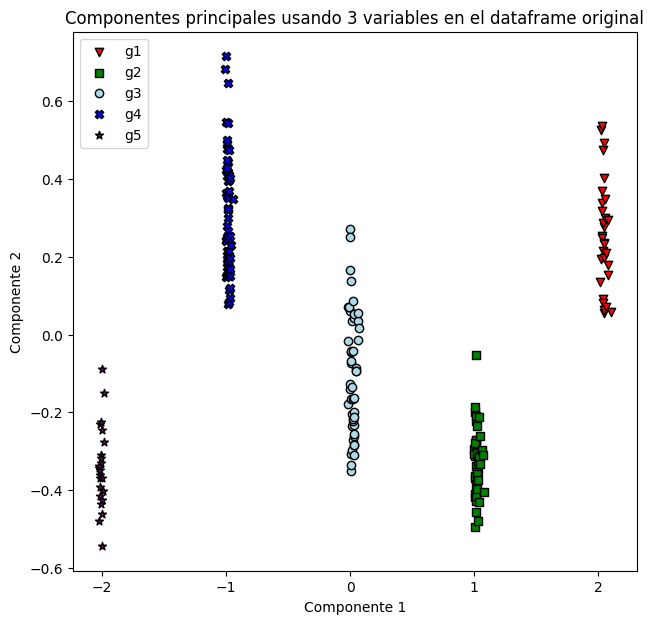

In [23]:
dataframe = df.copy().drop(["sexo","id"],axis = 1)#le borro las columnas sexo y id
#VARIABLE DATAFRAME ESCALADA.
dataframe_escalado= MinMaxScaler().fit(dataframe.values)
df_pre_data= pd.DataFrame(dataframe_escalado.transform(dataframe.values),columns=["edad","ingresos","puntaje"])



dataframe_pca = KMeans(n_clusters = 5,init="random",random_state=0).fit(df_pre_data)#EL N DE K LO CALCULE CON LA FUNCION CODO
#CLUSTERIZAR LOS DATOS
y_dataframe = dataframe_pca.fit_predict(df_pre_data)
#AGREGO UNA COLUMNA LLAMADA CLUSTER ,Y LE AGREGO EL NUMERO DE CLUSTER CON SUS RESPECTIVO DATO.
df_pre_data["cluster"] = y_dataframe
#CREO EL CLASIFICADOR DE COMPONENTES PRINCIPALES
pca_dataframe = PCA(n_components = 2,random_state=0)
pca_dataframe_1 = pca.fit_transform(df_pre_data)
pca_dataframe_df = pd.DataFrame(data=pca_dataframe_1,columns=["componente 1","componente 2"])
pca_dataframe_nombres=pd.concat([pca_dataframe_df,df_pre_data[["cluster"]]],axis=1)
#HAGO EL GRAFICO CON LAS SIGUIENTES DIMENSIONES
plt.figure(figsize=(16, 7))
#CREO PEQUEÑOS DATAFRAMES QUE CONTIENEN LOS DATOS CON SUS CLUSTERES.
g1_pca_dataframe=pca_dataframe_nombres[pca_dataframe_nombres.cluster==0]
g2_pca_dataframe=pca_dataframe_nombres[pca_dataframe_nombres.cluster==1]
g3_pca_dataframe=pca_dataframe_nombres[pca_dataframe_nombres.cluster==2]
g4_pca_dataframe=pca_dataframe_nombres[pca_dataframe_nombres.cluster==3]
g5_pca_dataframe=pca_dataframe_nombres[pca_dataframe_nombres.cluster==4]
#GRAFICO TODOS LOS GRUPOS
plt.subplot(1,2,2)
plt.scatter(x = g1_pca_dataframe["componente 1"],y = g1_pca_dataframe["componente 2"],marker="v",color ="red",edgecolor="black",label="g1")
plt.scatter(x = g2_pca_dataframe["componente 1"],y = g2_pca_dataframe["componente 2"],marker="s",color="green",edgecolor="black",label="g2")
plt.scatter(x = g3_pca_dataframe["componente 1"],y = g3_pca_dataframe["componente 2"],marker="o",color ="lightblue",edgecolor="black",label="g3")
plt.scatter(x = g4_pca_dataframe["componente 1"],y = g4_pca_dataframe["componente 2"],marker="X",color ="blue",edgecolor="black",label="g4")
plt.scatter(x = g5_pca_dataframe["componente 1"],y = g5_pca_dataframe["componente 2"],marker="*",color ="purple",edgecolor="black",label="g5")
plt.title("Componentes principales usando 3 variables en el dataframe original")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()


 Le calcule con el metodo del codo de 3 a 5 K , a partir de 5 la inercia se aplana




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

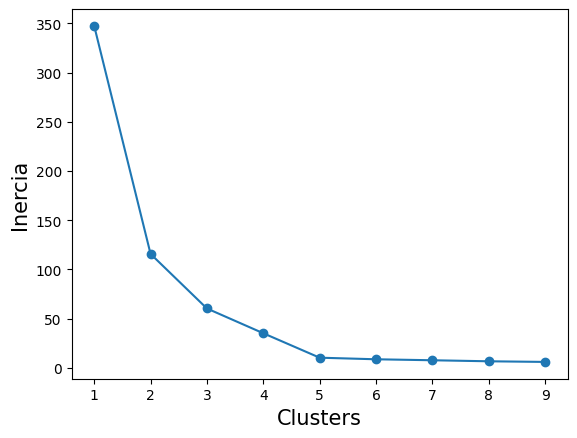

In [24]:
codo(df_pre_data)

In [25]:
grupo(df_pre_data)

,GRUPOS,COINCIDENCIAS
3,0,30
2,1,40
1,2,49
0,3,58
4,4,23


Por ultimo hago un grafico 3D con las 3 columnas .

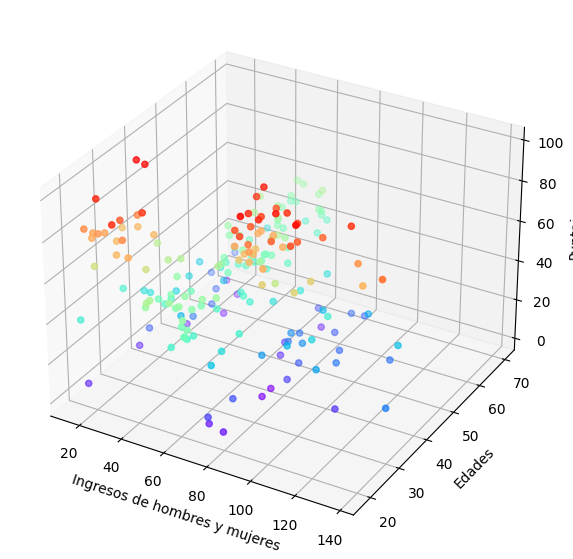

In [26]:
from matplotlib import projections
from mpl_toolkits.mplot3d import Axes3D#Traigo ejes
import matplotlib.cm as cm#Opcion mapa de colores

df_3d = df.copy().drop(["sexo","id"],axis = 1)#le borro las columnas sexo y id,uso la funcion copia xq sino me aparece un error.

df_x = df_3d["ingresos"].values
df_y = df_3d["edad"].values
df_z = df_3d["puntaje"].values

fig = plt.figure(figsize=(14, 7))

ax = fig.add_subplot(111,projection="3d")
ax.scatter3D(df_x , df_y , df_z,c=df_z,cmap="rainbow")
ax.set_xlabel('Ingresos de hombres y mujeres')
ax.set_ylabel('Edades')
ax.set_zlabel('Puntaje')
plt.show()